In [299]:
import pandas as pd
import numpy as np
import sqlite3
import glob
import os
import csv
import matplotlib.pyplot as plt
import scipy.stats as st

In [300]:
# Dataframe individual de cada csv para poder consultarlos por separado 

csv_1=pd.read_csv('./ejercicio_Parte_01.csv')
csv_2=pd.read_csv('./ejercicio_Parte_02.csv')
csv_3=pd.read_csv('./ejercicio_Parte_03.csv')
csv_4=pd.read_csv('./ejercicio_Parte_04.csv')
csv_5=pd.read_csv('./ejercicio_Parte_05.csv')
csv_6=pd.read_csv('./ejercicio_Parte_06.csv')
csv_7=pd.read_csv('./ejercicio_Parte_07.csv')
csv_8=pd.read_csv('./ejercicio_Parte_08.csv')
csv_9=pd.read_csv('./ejercicio_Parte_09.csv')
csv_10=pd.read_csv('./ejercicio_Parte_10.csv')



In [301]:
# No funciona el concat para unirlos 
amapola_df=pd.concat([csv_1,csv_2,csv_3,csv_4,csv_5,csv_6,csv_7,csv_8,csv_9,csv_10],ignore_index=True)

In [302]:
amapola_df

,Dias,Ciudad,Don Limpio,Scotch Brite,Saimaza,Ariel,Mistol,Fairy,Cola Cao,CristaSol,...,Colhogar,Superglue,Orbit,Cleesa,Gallo,Denenes,Kleenex,Calvo,Isabel,Gallina_Blanca
0,Lunes,Barcelona,716,269,193,30,542,6,396,183,...,332,450.0,1201,214,1019,385,365.0,1154,197,1069
1,Lunes,Barcelona,512,124,302,97,567,18,492,571,...,91,362.0,543,317,1007,214,373.0,1031,215,712
2,Lunes,Barcelona,148,501,9,57,925,96,133,645,...,86,491.0,571,65,995,231,419.0,1049,41,686
3,Lunes,Barcelona,28,127,453,51,964,27,278,311,...,14,505.0,697,543,1017,448,730.0,1010,36,727
4,Lunes,Barcelona,674,431,241,133,404,110,265,249,...,135,487.0,585,257,1071,203,446.0,1074,203,485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,Sabado,Orinoco,306,502,179,395,673,73,258,519,...,324,493.0,1107,301,745,198,386.0,525,306,601
599996,Sabado,Orinoco,234,394,510,106,313,307,204,392,...,206,897.0,993,153,1082,78,380.0,1007,64,520
599997,Sabado,Orinoco,132,327,431,273,164,740,97,164,...,372,469.0,982,287,1181,392,721.0,591,508,676
599998,Sabado,Orinoco,121,492,54,360,610,742,280,442,...,174,735.0,1073,290,1175,134,477.0,639,792,1184


In [303]:
amapola_df['Ciudad'].unique()

array(['Barcelona', 'Madrid', 'Granada', 'Cuenca', 'Valencia', 'Sevilla',
       'Palermo', 'Orinoco'], dtype=object)

In [304]:
amapola_df.describe().T #Traspone los valores 

,count,mean,std,min,25%,50%,75%,max
Don Limpio,600000.0,243.838665,200.690126,1.0,88.0,185.0,350.0,957.0
Scotch Brite,600000.0,282.717625,221.264890,1.0,101.0,223.0,424.0,991.0
Saimaza,600000.0,254.856348,206.453861,1.0,92.0,197.0,371.0,981.0
Ariel,600000.0,303.827417,220.737717,1.0,124.0,255.0,446.0,995.0
Mistol,600000.0,261.790893,213.716730,1.0,89.0,205.0,384.0,989.0
Fairy,600000.0,267.439270,211.582188,1.0,91.0,220.0,391.0,982.0
Cola Cao,600000.0,283.505597,215.290741,1.0,107.0,237.0,408.0,993.0
CristaSol,600000.0,291.976770,216.810524,1.0,116.0,240.0,427.0,993.0
Mimosin,600000.0,287.542645,224.138565,1.0,107.0,227.0,424.0,998.0
El Pozo,600000.0,292.856008,227.514577,1.0,100.0,240.0,447.0,998.0


In [305]:
amapola_df['Don Limpio'].skew() # Asimetría

1.094816840387042

In [306]:
amapola_df['Don Limpio'].kurt() # Calcula la Simetría

0.5816406194607309

In [307]:
coeficiente_var=amapola_df['Don Limpio'].std()/amapola_df['Don Limpio'].mean()
coeficiente_var

0.8230447224449432

In [308]:
quantiles_025= amapola_df['Don Limpio'].quantile(0.25)
quantiles_075= amapola_df['Don Limpio'].quantile(0.75)
quantiles_075-quantiles_025

262.0

In [309]:
precio_don_limpio=((quantiles_075-quantiles_025)/3)*coeficiente_var
precio_don_limpio.round(2)

71.88

In [310]:
df_reordenado=amapola_df.describe().T

In [311]:
# df_reordenado=df_reordenado.rename_axis('Productos', axis= 0).reset_index()
df_reordenado

,count,mean,std,min,25%,50%,75%,max
Don Limpio,600000.0,243.838665,200.690126,1.0,88.0,185.0,350.0,957.0
Scotch Brite,600000.0,282.717625,221.264890,1.0,101.0,223.0,424.0,991.0
Saimaza,600000.0,254.856348,206.453861,1.0,92.0,197.0,371.0,981.0
Ariel,600000.0,303.827417,220.737717,1.0,124.0,255.0,446.0,995.0
Mistol,600000.0,261.790893,213.716730,1.0,89.0,205.0,384.0,989.0
Fairy,600000.0,267.439270,211.582188,1.0,91.0,220.0,391.0,982.0
Cola Cao,600000.0,283.505597,215.290741,1.0,107.0,237.0,408.0,993.0
CristaSol,600000.0,291.976770,216.810524,1.0,116.0,240.0,427.0,993.0
Mimosin,600000.0,287.542645,224.138565,1.0,107.0,227.0,424.0,998.0
El Pozo,600000.0,292.856008,227.514577,1.0,100.0,240.0,447.0,998.0


In [312]:
curtosis=amapola_df.iloc[:,2:].kurt()
curtosis

# kurtosis > 0 -> Leptocurtica
# Kurtosis = 0 -> Mesocurtica
# Kurtosis < 0 -> Platicurtica

Don Limpio          0.581641
Scotch Brite       -0.134857
Saimaza             0.517205
Ariel              -0.295054
Mistol              0.297016
Fairy               0.195259
Cola Cao            0.175573
CristaSol          -0.118671
Mimosin             0.026563
El Pozo            -0.307127
KH-7               -0.594770
Colgate            -0.169265
Sensodine          -0.230803
Listerine          -0.143000
Mousel              0.028230
H&S                -0.189457
Pantene            -0.213446
Valor              -0.091577
Nelly              -0.045690
Matutano            0.169683
Nivea              -0.167722
Loreal             -0.076557
Duracell           -0.227158
Campofrio          -0.093110
ZumoSol            -0.029413
Monster             0.374378
Veet               -0.715897
Gillete            -1.111026
Coca_Cola           5.416355
Pepsi              -1.250360
Puleva              0.315035
Pascual            -0.943796
Cuetara            -1.149959
Casa_Tarradellas    3.342263
Danone        

In [313]:
df_reordenado["Curtosis"]= curtosis

In [314]:
# Añadir las columnas con los cálculos 
df_reordenado.head()

,count,mean,std,min,25%,50%,75%,max,Curtosis
Don Limpio,600000.0,243.838665,200.690126,1.0,88.0,185.0,350.0,957.0,0.581641
Scotch Brite,600000.0,282.717625,221.264890,1.0,101.0,223.0,424.0,991.0,-0.134857
Saimaza,600000.0,254.856348,206.453861,1.0,92.0,197.0,371.0,981.0,0.517205
Ariel,600000.0,303.827417,220.737717,1.0,124.0,255.0,446.0,995.0,-0.295054
Mistol,600000.0,261.790893,213.716730,1.0,89.0,205.0,384.0,989.0,0.297016


In [315]:
#Calculamos y añadimos el coeficiente de variación 
df_reordenado["Coefi Var"]= df_reordenado["std"]/df_reordenado["mean"]
df_reordenado.head()

,count,mean,std,min,25%,50%,75%,max,Curtosis,Coefi Var
Don Limpio,600000.0,243.838665,200.690126,1.0,88.0,185.0,350.0,957.0,0.581641,0.823045
Scotch Brite,600000.0,282.717625,221.264890,1.0,101.0,223.0,424.0,991.0,-0.134857,0.782636
Saimaza,600000.0,254.856348,206.453861,1.0,92.0,197.0,371.0,981.0,0.517205,0.810079
Ariel,600000.0,303.827417,220.737717,1.0,124.0,255.0,446.0,995.0,-0.295054,0.726523
Mistol,600000.0,261.790893,213.716730,1.0,89.0,205.0,384.0,989.0,0.297016,0.816364


In [316]:
# Calculamos y añadimos la asimetría 
df_reordenado['Asimetria']=amapola_df.iloc[:,2:].skew()
df_reordenado.head()

,count,mean,std,min,25%,50%,75%,max,Curtosis,Coefi Var,Asimetria
Don Limpio,600000.0,243.838665,200.690126,1.0,88.0,185.0,350.0,957.0,0.581641,0.823045,1.094817
Scotch Brite,600000.0,282.717625,221.264890,1.0,101.0,223.0,424.0,991.0,-0.134857,0.782636,0.855238
Saimaza,600000.0,254.856348,206.453861,1.0,92.0,197.0,371.0,981.0,0.517205,0.810079,1.061443
Ariel,600000.0,303.827417,220.737717,1.0,124.0,255.0,446.0,995.0,-0.295054,0.726523,0.738622
Mistol,600000.0,261.790893,213.716730,1.0,89.0,205.0,384.0,989.0,0.297016,0.816364,0.992938


In [317]:
# CAlculamos y añadimos el rango intercuartilico 
df_reordenado['Rango_Inter']=df_reordenado['75%']-df_reordenado['25%']
df_reordenado.head()

,count,mean,std,min,25%,50%,75%,max,Curtosis,Coefi Var,Asimetria,Rango_Inter
Don Limpio,600000.0,243.838665,200.690126,1.0,88.0,185.0,350.0,957.0,0.581641,0.823045,1.094817,262.0
Scotch Brite,600000.0,282.717625,221.264890,1.0,101.0,223.0,424.0,991.0,-0.134857,0.782636,0.855238,323.0
Saimaza,600000.0,254.856348,206.453861,1.0,92.0,197.0,371.0,981.0,0.517205,0.810079,1.061443,279.0
Ariel,600000.0,303.827417,220.737717,1.0,124.0,255.0,446.0,995.0,-0.295054,0.726523,0.738622,322.0
Mistol,600000.0,261.790893,213.716730,1.0,89.0,205.0,384.0,989.0,0.297016,0.816364,0.992938,295.0


In [318]:
#Limpiamos el data frame de los valores que no vamos a utilizar
df_final= df_reordenado.drop(['count','min','max','25%','75%'], axis=1)
df_final.head()

,mean,std,50%,Curtosis,Coefi Var,Asimetria,Rango_Inter
Don Limpio,243.838665,200.690126,185.0,0.581641,0.823045,1.094817,262.0
Scotch Brite,282.717625,221.264890,223.0,-0.134857,0.782636,0.855238,323.0
Saimaza,254.856348,206.453861,197.0,0.517205,0.810079,1.061443,279.0
Ariel,303.827417,220.737717,255.0,-0.295054,0.726523,0.738622,322.0
Mistol,261.790893,213.716730,205.0,0.297016,0.816364,0.992938,295.0


In [319]:
# Creamos una función para el cálculo de los precios donde x representa el valor de cada celda

def fun_precios(x):
    if x['Asimetria']>0 and x['Curtosis']<0:
        precio= (x['Rango_Inter']/3) * x['Coefi Var']
        return(precio)
    elif x['Asimetria']<0 and x['Curtosis']<0:
        precio = x['mean']*(x['std']/10)
        return(precio)
    elif x['Asimetria']>0 and x['Curtosis']>0:
        precio = x['50%']*abs(x['Asimetria'])
        return(precio)
    else:
        precio = x['50%']*10
        return(precio)

In [320]:
df_final['Precio'] = df_final.apply(lambda x: fun_precios(x).round(2), axis=1)
df_final.head()

,mean,std,50%,Curtosis,Coefi Var,Asimetria,Rango_Inter,Precio
Don Limpio,243.838665,200.690126,185.0,0.581641,0.823045,1.094817,262.0,202.54
Scotch Brite,282.717625,221.264890,223.0,-0.134857,0.782636,0.855238,323.0,84.26
Saimaza,254.856348,206.453861,197.0,0.517205,0.810079,1.061443,279.0,209.10
Ariel,303.827417,220.737717,255.0,-0.295054,0.726523,0.738622,322.0,77.98
Mistol,261.790893,213.716730,205.0,0.297016,0.816364,0.992938,295.0,203.55


In [321]:
df_final.info()
52/4


<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Don Limpio to Gallina_Blanca
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mean         52 non-null     float64
 1   std          52 non-null     float64
 2   50%          52 non-null     float64
 3   Curtosis     52 non-null     float64
 4   Coefi Var    52 non-null     float64
 5   Asimetria    52 non-null     float64
 6   Rango_Inter  52 non-null     float64
 7   Precio       52 non-null     float64
dtypes: float64(8)
memory usage: 5.7+ KB


13.0

In [322]:
# Creo un nuevo CSV con el data frame grande para analizar las variables en Tableau
# amapola_df.to_csv('amapola_market', index=False)

In [323]:
amapola_tableau=amapola_df.T

In [324]:
amapola_tableau.reset_index(inplace=True)

In [325]:
amapola_tableau.head()

,index,0,1,2,3,4,5,6,7,8,...,599990,599991,599992,599993,599994,599995,599996,599997,599998,599999
0,Dias,Lunes,Lunes,Lunes,Lunes,Lunes,Lunes,Lunes,Lunes,Lunes,...,Sabado,Sabado,Sabado,Sabado,Sabado,Sabado,Sabado,Sabado,Sabado,Sabado
1,Ciudad,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,...,Orinoco,Orinoco,Orinoco,Orinoco,Orinoco,Orinoco,Orinoco,Orinoco,Orinoco,Orinoco
2,Don Limpio,716,512,148,28,674,6,241,433,74,...,150,10,311,326,298,306,234,132,121,135
3,Scotch Brite,269,124,501,127,431,505,224,401,305,...,453,581,357,267,256,502,394,327,492,428
4,Saimaza,193,302,9,453,241,417,238,63,115,...,818,415,789,197,688,179,510,431,54,254


In [326]:
amapola_tab_last=amapola_tableau.drop([0,1], axis=0)

In [327]:
amapola_tab_last.head()

,index,0,1,2,3,4,5,6,7,8,...,599990,599991,599992,599993,599994,599995,599996,599997,599998,599999
2,Don Limpio,716,512,148,28,674,6,241,433,74,...,150,10,311,326,298,306,234,132,121,135
3,Scotch Brite,269,124,501,127,431,505,224,401,305,...,453,581,357,267,256,502,394,327,492,428
4,Saimaza,193,302,9,453,241,417,238,63,115,...,818,415,789,197,688,179,510,431,54,254
5,Ariel,30,97,57,51,133,121,251,140,84,...,230,116,209,742,781,395,106,273,360,564
6,Mistol,542,567,925,964,404,394,685,57,879,...,27,350,291,473,160,673,313,164,610,660


In [328]:
# amapola_tableau.to_csv('amapola_tableau', index=False)

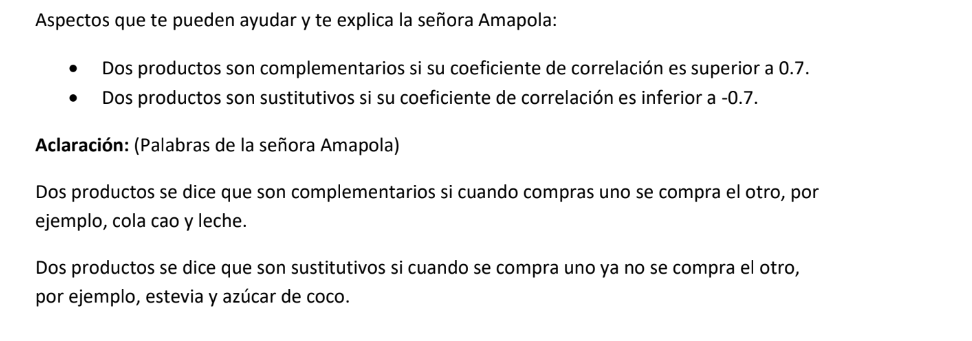

In [329]:
amapola_df.head(2)

,Dias,Ciudad,Don Limpio,Scotch Brite,Saimaza,Ariel,Mistol,Fairy,Cola Cao,CristaSol,...,Colhogar,Superglue,Orbit,Cleesa,Gallo,Denenes,Kleenex,Calvo,Isabel,Gallina_Blanca
0,Lunes,Barcelona,716,269,193,30,542,6,396,183,...,332,450.0,1201,214,1019,385,365.0,1154,197,1069
1,Lunes,Barcelona,512,124,302,97,567,18,492,571,...,91,362.0,543,317,1007,214,373.0,1031,215,712


In [330]:
df_corre= amapola_df.drop(['Dias','Ciudad'],axis=1)

In [349]:
correlacion= df_corre.corr().round(4)

In [350]:
# !pip install openpyxl

In [351]:
# import openpyxl

In [352]:
# correlacion.to_excel("coreelacion.xlsx", index=False)

In [353]:
correlacion

,Don Limpio,Scotch Brite,Saimaza,Ariel,Mistol,Fairy,Cola Cao,CristaSol,Mimosin,El Pozo,...,Colhogar,Superglue,Orbit,Cleesa,Gallo,Denenes,Kleenex,Calvo,Isabel,Gallina_Blanca
Don Limpio,1.0000,0.0058,0.0014,-0.0069,0.0960,0.0468,-0.0065,-0.0710,0.0215,-0.0013,...,-0.0205,-0.0196,-0.0187,-0.0225,0.0083,-0.0243,-0.0439,0.0044,-0.0852,-0.0563
Scotch Brite,0.0058,1.0000,0.0756,-0.0382,0.0375,-0.0889,0.0074,0.0112,-0.0393,0.0062,...,-0.0242,0.0093,0.0412,0.0229,0.0834,-0.0504,-0.0438,-0.0326,0.0553,0.0346
Saimaza,0.0014,0.0756,1.0000,0.0692,0.0190,0.0397,-0.0273,0.0450,-0.0168,0.0494,...,-0.0027,-0.0164,-0.0348,-0.0202,0.0224,-0.0712,0.0382,0.0519,0.0703,-0.0032
Ariel,-0.0069,-0.0382,0.0692,1.0000,0.0207,0.0371,0.0161,-0.0196,-0.0022,0.0259,...,0.0207,0.0243,-0.0132,0.0186,0.0284,0.0287,-0.0260,-0.0418,0.0110,-0.0061
Mistol,0.0960,0.0375,0.0190,0.0207,1.0000,0.0553,-0.0312,0.0168,0.0327,-0.0621,...,-0.0114,-0.0555,0.0113,0.0686,0.0587,0.0408,-0.0397,0.0167,-0.0043,-0.0728
Fairy,0.0468,-0.0889,0.0397,0.0371,0.0553,1.0000,0.0035,0.0244,0.0698,0.0160,...,-0.0207,0.0010,-0.0557,-0.1144,-0.0424,0.0807,0.0143,0.0100,0.0993,-0.0600
Cola Cao,-0.0065,0.0074,-0.0273,0.0161,-0.0312,0.0035,1.0000,0.0409,-0.0137,0.0575,...,0.0409,0.0013,-0.0078,0.0560,-0.0119,-0.0521,-0.0421,-0.0504,0.0001,-0.0506
CristaSol,-0.0710,0.0112,0.0450,-0.0196,0.0168,0.0244,0.0409,1.0000,0.0168,-0.0326,...,-0.0040,0.0246,-0.0445,-0.0194,0.0590,-0.0143,-0.0285,-0.0249,0.0559,-0.0160
Mimosin,0.0215,-0.0393,-0.0168,-0.0022,0.0327,0.0698,-0.0137,0.0168,1.0000,-0.0371,...,-0.0502,-0.0049,-0.0637,-0.0955,-0.0605,0.0572,0.0279,-0.0100,-0.0520,-0.1252
El Pozo,-0.0013,0.0062,0.0494,0.0259,-0.0621,0.0160,0.0575,-0.0326,-0.0371,1.0000,...,0.0169,-0.0099,-0.0380,-0.0342,0.0309,-0.0531,0.0373,-0.0496,0.0675,0.0368


In [354]:
# correlacion.to_csv('Corre_excel',index=False)

In [355]:
# import seaborn as sns

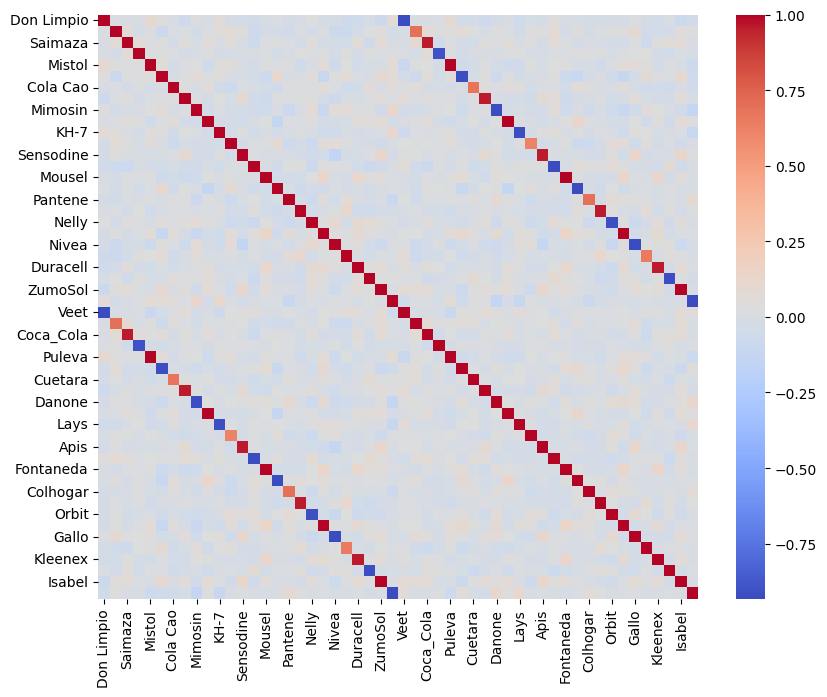

In [356]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, cmap='coolwarm')
plt.subplots_adjust(left=0.15, bottom=0.15)
# Mostrar el gráfico


In [357]:
resaltar_corr = correlacion[(correlacion >= 0.70) | (correlacion <= -0.70)]

resaltar_corr


,Don Limpio,Scotch Brite,Saimaza,Ariel,Mistol,Fairy,Cola Cao,CristaSol,Mimosin,El Pozo,...,Colhogar,Superglue,Orbit,Cleesa,Gallo,Denenes,Kleenex,Calvo,Isabel,Gallina_Blanca
Don Limpio,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scotch Brite,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saimaza,NaN,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ariel,NaN,NaN,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mistol,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fairy,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cola Cao,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CristaSol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mimosin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
El Pozo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [358]:
variables = correlacion.columns.tolist() 

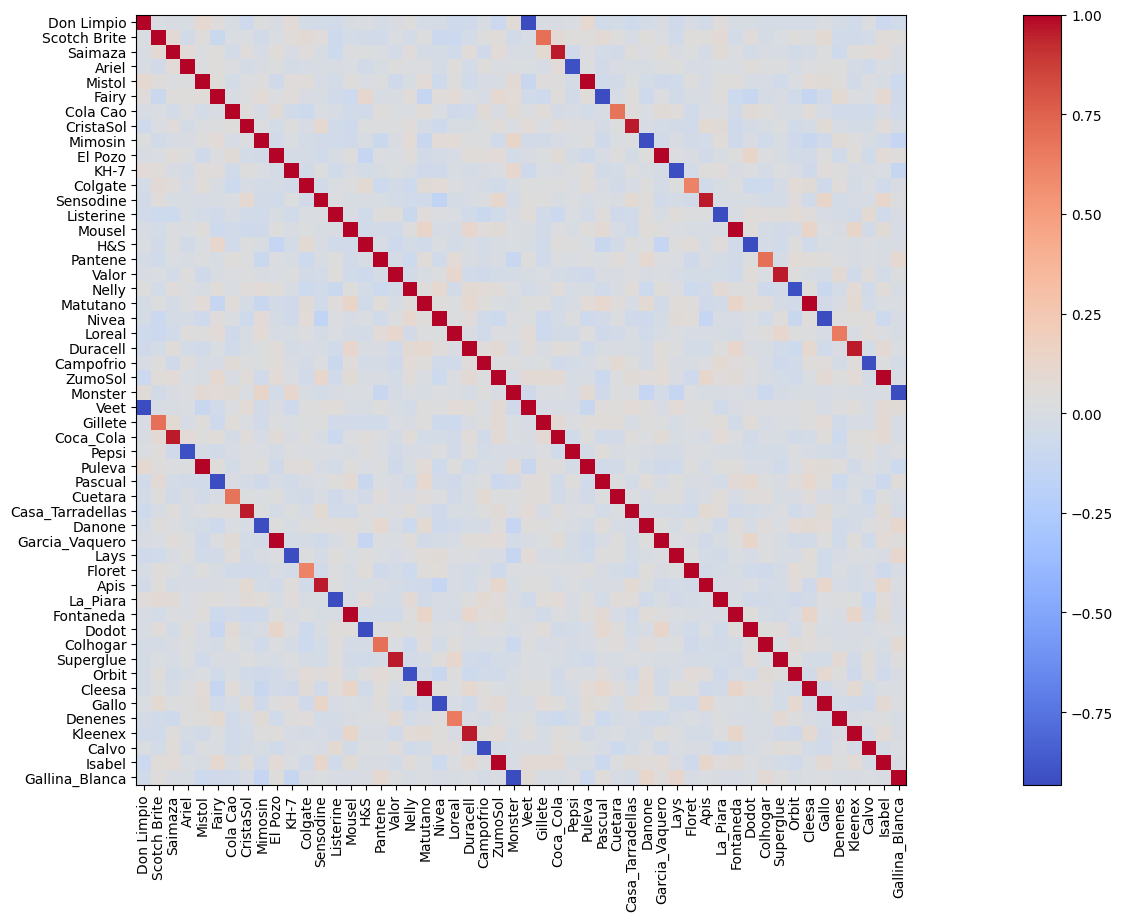

In [359]:
fig, ax = plt.subplots(figsize=(30, 10))  
im = ax.imshow(correlacion, cmap='coolwarm', interpolation='none')

ax.set_xticks(range(len(variables)))
ax.set_yticks(range(len(variables)))
ax.set_xticklabels(variables, rotation=90)
ax.set_yticklabels(variables)

plt.colorbar(im)

plt.show()


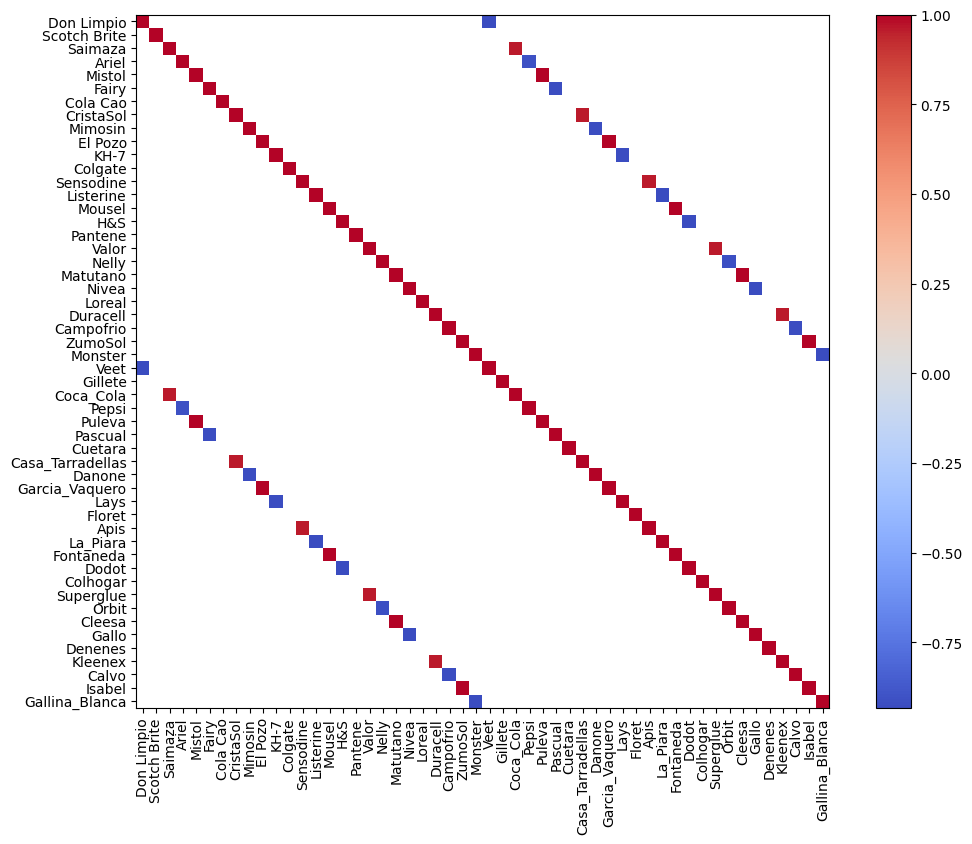

In [360]:
fig, ax = plt.subplots(figsize=(12, 9))  
im = ax.imshow(resaltar_corr, cmap='coolwarm', interpolation='none')

ax.set_xticks(range(len(variables)))
ax.set_yticks(range(len(variables)))
ax.set_xticklabels(variables, rotation=90)
ax.set_yticklabels(variables)

plt.colorbar(im)

plt.show()

In [361]:
# # Creamos un for para que me traiga los productos que tienen correlación
# valor=True
# # Ciclo for para recorrer las filas
# for fila in correlacion:
#     # Ciclo for para recorrer las columnas
#     for producto in fila:
#         if 0.7000 <= valor <= 1:
#             print(producto, end='')

In [362]:
# Recorremos las columnas para obtener los nombres de los productos
productos = correlacion.columns[1:]

# Lista vacía cumplen con la condición
cumplen_condicion = []

# recorremos los productos
for i, producto in enumerate(productos):
    # productos a comparar
    for j in range(len(productos)):
        producto_comparar = productos[j]
        correlacion_valor = correlacion[producto][producto_comparar]
        correlacion_valor = float(correlacion_valor)  # Convertir a float
        if 0.70 <= correlacion_valor < 1:
            cumplen_condicion.append((producto, producto_comparar, correlacion_valor))
        i=i+1
# Correlaciones que cumplen con la condición
for correlacion in cumplen_condicion:
    print("Producto 1:", correlacion[0])
    print("Producto 2:", correlacion[1])
    print("Correlación:", correlacion[2])
    print("---")

Producto 1: Saimaza
Producto 2: Coca_Cola
Correlación: 0.9556
---
Producto 1: CristaSol
Producto 2: Casa_Tarradellas
Correlación: 0.9587
---
Producto 1: Sensodine
Producto 2: Apis
Correlación: 0.9568
---
Producto 1: Valor
Producto 2: Superglue
Correlación: 0.959
---
Producto 1: Duracell
Producto 2: Kleenex
Correlación: 0.9581
---
Producto 1: Coca_Cola
Producto 2: Saimaza
Correlación: 0.9556
---
Producto 1: Casa_Tarradellas
Producto 2: CristaSol
Correlación: 0.9587
---
Producto 1: Apis
Producto 2: Sensodine
Correlación: 0.9568
---
Producto 1: Superglue
Producto 2: Valor
Correlación: 0.959
---
Producto 1: Kleenex
Producto 2: Duracell
Correlación: 0.9581
---


In [363]:
cumplen_condicion

[('Saimaza', 'Coca_Cola', 0.9556),
 ('CristaSol', 'Casa_Tarradellas', 0.9587),
 ('Sensodine', 'Apis', 0.9568),
 ('Valor', 'Superglue', 0.959),
 ('Duracell', 'Kleenex', 0.9581),
 ('Coca_Cola', 'Saimaza', 0.9556),
 ('Casa_Tarradellas', 'CristaSol', 0.9587),
 ('Apis', 'Sensodine', 0.9568),
 ('Superglue', 'Valor', 0.959),
 ('Kleenex', 'Duracell', 0.9581)]